In [1]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Activation
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.recurrent import SimpleRNN
from keras.layers.recurrent import LSTM 
from keras.layers.recurrent import GRU
from keras.optimizers import Adam
from keras.utils import np_utils
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
import matplotlib.pyplot as plt
import seaborn as sns

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print('train:',len(X_train),'test:',len(X_test))

train: 60000 test: 10000


In [4]:
classes = 10
cnn_epochs = 10
rnn_epochs = 20
batch_size = 200
cnn_input_shape = (28, 28, 1)
rnn_input_shape = (28, 28)
pool_size = (2, 2)
#Convolution Layer 1
filters_1 = 64
kernel_size_1 = (5, 5)
#Convolution Layer 2
filters_2 = 64
kernel_size_2 = (3, 3)
dropout = 0.4
dense_units = 256
#Number of hidden units
hidden_units_1 = 64
hidden_units_2 = 64

In [5]:
cnn_X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1).astype('float32')
cnn_X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1).astype('float32')
cnn_X_train/=255
cnn_X_test/=255

In [6]:
rnn_X_train = X_train.astype('float32')
rnn_X_test = X_test.astype('float32')
rnn_X_train/=255
rnn_X_test/=255

In [7]:
# one-hot encoding:
Y_train = np_utils.to_categorical(y_train, classes)
Y_test = np_utils.to_categorical(y_test, classes)

In [8]:
print('cnn_X_train:', cnn_X_train.shape)
print('cnn_X_test:', cnn_X_test.shape)
print('rnn_X_train:', rnn_X_train.shape)
print('rnn_X_test:', rnn_X_test.shape)
print('Y_train:', Y_train.shape)
print('Y_test:', Y_test.shape)

cnn_X_train: (60000, 28, 28, 1)
cnn_X_test: (10000, 28, 28, 1)
rnn_X_train: (60000, 28, 28)
rnn_X_test: (10000, 28, 28)
Y_train: (60000, 10)
Y_test: (10000, 10)


In [9]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = filters_1, kernel_size = kernel_size_1, input_shape = cnn_input_shape, activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = pool_size))
cnn_model.add(Conv2D(filters = filters_2, kernel_size = kernel_size_2, activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = pool_size))
cnn_model.add(Dropout(dropout))
cnn_model.add(Flatten())
cnn_model.add(Dense(dense_units, activation='relu'))
cnn_model.add(Dense(classes, activation='softmax'))
cnn_model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
print(cnn_model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 64)        1664      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               409856    
__________

In [10]:
rnn_model = Sequential()
rnn_model.add(SimpleRNN(hidden_units_1, input_shape = rnn_input_shape, return_sequences=True))
rnn_model.add(SimpleRNN(hidden_units_2))
rnn_model.add(Dense(units = classes))
rnn_model.add(Activation('softmax'))
rnn_model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
print(rnn_model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 28, 64)            5952      
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 14,858
Trainable params: 14,858
Non-trainable params: 0
_________________________________________________________________
None


CNN Model


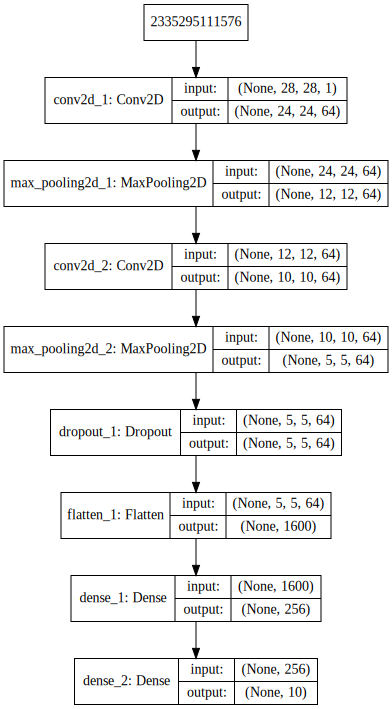

In [11]:
print("CNN Model")
SVG(model_to_dot(cnn_model, show_shapes=True).create(prog='dot', format='svg'))

RNN Model


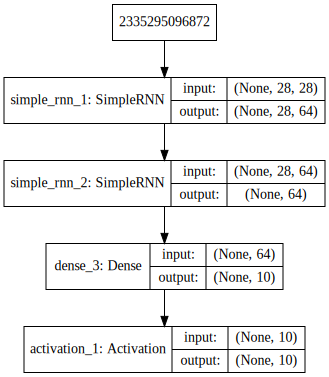

In [12]:
print("RNN Model")
SVG(model_to_dot(rnn_model, show_shapes=True).create(prog='dot', format='svg'))

In [13]:
cnn_history = cnn_model.fit(cnn_X_train, Y_train, validation_data = (cnn_X_test, Y_test), epochs = cnn_epochs, batch_size = batch_size)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 108s 2ms/step - loss: 0.2235 - acc: 0.9330 - val_loss: 0.0645 - val_acc: 0.9795
Epoch 2/10
60000/60000 [==============================] - 104s 2ms/step - loss: 0.0658 - acc: 0.9802 - val_loss: 0.0342 - val_acc: 0.9889
Epoch 3/10
60000/60000 [==============================] - 104s 2ms/step - loss: 0.0467 - acc: 0.9854 - val_loss: 0.0282 - val_acc: 0.9905
Epoch 4/10
60000/60000 [==============================] - 104s 2ms/step - loss: 0.0388 - acc: 0.9875 - val_loss: 0.0237 - val_acc: 0.9914
Epoch 5/10
60000/60000 [==============================] - 104s 2ms/step - loss: 0.0320 - acc: 0.9900 - val_loss: 0.0310 - val_acc: 0.9891
Epoch 6/10
60000/60000 [==============================] - 103s 2ms/step - loss: 0.0263 - acc: 0.9916 - val_loss: 0.0274 - val_acc: 0.9904
Epoch 7/10
60000/60000 [==============================] - 104s 2ms/step - loss: 0.0237 - acc: 0.9923 - val_loss: 0.0211 - 

In [14]:
rnn_history = rnn_model.fit(rnn_X_train, Y_train, validation_data = (rnn_X_test, Y_test), epochs = rnn_epochs, batch_size = batch_size)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 13s 224us/step - loss: 0.6188 - acc: 0.8107 - val_loss: 0.2725 - val_acc: 0.9193
Epoch 2/20
60000/60000 [==============================] - 13s 218us/step - loss: 0.2305 - acc: 0.9327 - val_loss: 0.1619 - val_acc: 0.9521
Epoch 3/20
60000/60000 [==============================] - 13s 218us/step - loss: 0.1774 - acc: 0.9482 - val_loss: 0.1396 - val_acc: 0.9598
Epoch 4/20
60000/60000 [==============================] - 14s 225us/step - loss: 0.1463 - acc: 0.9575 - val_loss: 0.1371 - val_acc: 0.9588
Epoch 5/20
60000/60000 [==============================] - 13s 220us/step - loss: 0.1251 - acc: 0.9633 - val_loss: 0.1230 - val_acc: 0.9652
Epoch 6/20
60000/60000 [==============================] - 13s 220us/step - loss: 0.1164 - acc: 0.9651 - val_loss: 0.1001 - val_acc: 0.9708
Epoch 7/20
60000/60000 [==============================] - 13s 219us/step - loss: 0.1053 - acc: 0.9685 - val_loss: 0.

In [15]:
cnn_model.save('MNIST_Handwritten_Digit_Classification_Challenge_cnn.h5')

In [16]:
rnn_model.save('MNIST_Handwritten_Digit_Classification_Challenge_rnn.h5')

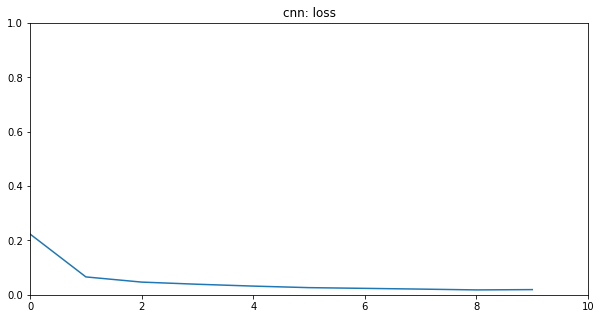

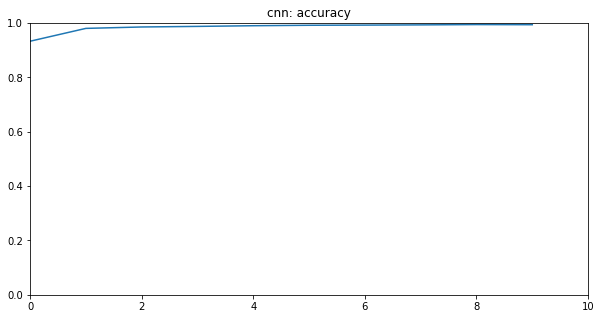

In [17]:
plt.figure(figsize=(cnn_epochs,5))
plt.plot(cnn_history.epoch,cnn_history.history['loss'])
plt.xlim(0, cnn_epochs)
plt.ylim(0, 1)
plt.title('cnn: loss')

plt.figure(figsize=(cnn_epochs,5))
plt.plot(cnn_history.epoch,cnn_history.history['acc'])
plt.xlim(0, cnn_epochs)
plt.ylim(0, 1)
plt.title('cnn: accuracy');

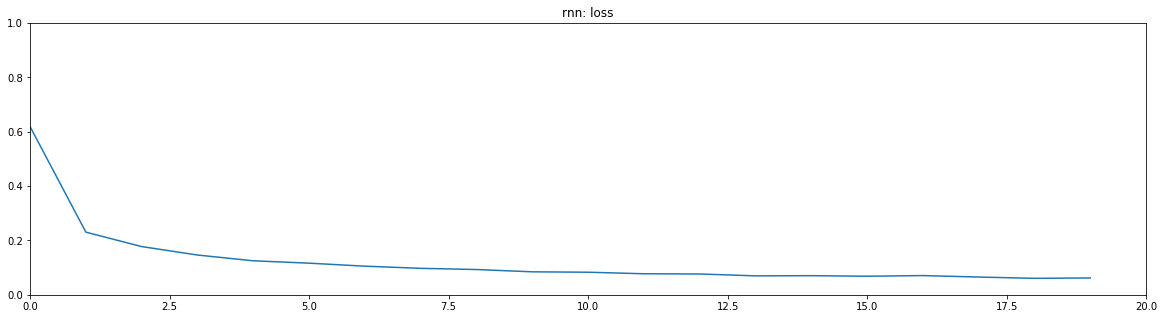

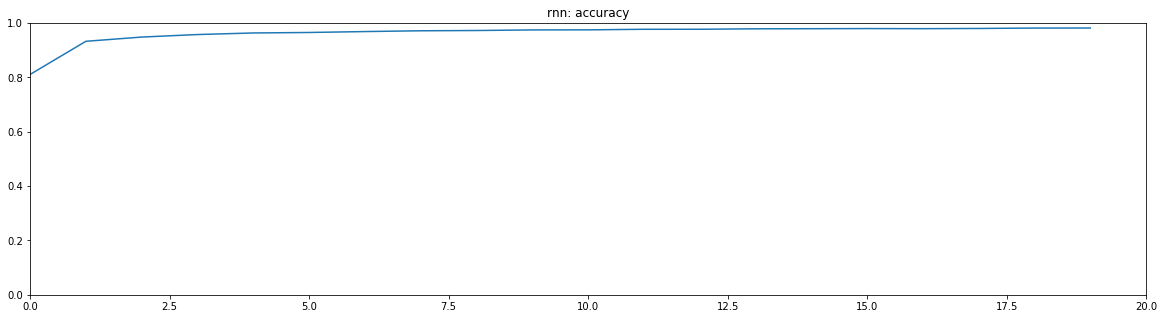

In [18]:
plt.figure(figsize=(rnn_epochs,5))
plt.plot(rnn_history.epoch,rnn_history.history['loss'])
plt.xlim(0, rnn_epochs)
plt.ylim(0, 1)
plt.title('rnn: loss')

plt.figure(figsize=(rnn_epochs,5))
plt.plot(rnn_history.epoch,rnn_history.history['acc'])
plt.xlim(0, rnn_epochs)
plt.ylim(0, 1)
plt.title('rnn: accuracy');